In [33]:
import numpy as np 
import matplotlib.pyplot as plt 

import pandas as pd 
import geopandas as gpd

import os 
import re

import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
starbucks_ca = pd.read_csv('starbucks_in_california.csv')
starbucks_city = pd.read_csv('starbucks_in_california_city_stats.csv')
starbucks_county = pd.read_csv('starbucks_in_california_county_stats.csv')

In [3]:
starbucks_ca.head(5)

,id,name,ownership_type,phone_number,address,city,county,zip,coordinates,state,...,starbucks_reserve_clover_brewed,oven_warmed_food,free_wi_fi,verismo_system,mobile_payment,digital_rewards,la_boulange,fizzio_handcrafted_sodas,drive_thru,link
0,9128,100 West Portal/Vicente,Company Owned,(415) 664-8370,"100 West Portal, 941271306 San Francisco Coun...",San Francisco - San Francisco County,San Francisco County,941271306,POINT(-122.467323 37.739684),California,...,True,True,False,False,True,True,True,False,False,http://www.starbucks.com/store/9128/us
1,14672,"10th & Hwy 14, Palmdale",Company Owned,661-266-2314,"39904 10th Street West, 935513003 Los Angeles...",Palmdale - Los Angeles County,Los Angeles County,935513003,POINT(-118.147264 34.607218),California,...,False,True,True,False,True,True,True,True,True,http://www.starbucks.com/store/14672/us
2,8147,"10th & Market, San Diego",Company Owned,619-696-3750,"1011 Market Street, 921017233 San Diego Count...",San Diego - San Diego County,San Diego County,921017233,POINT(-117.155362 32.711361),California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/8147/us
3,15457,11th & Corral Hollow - Tracy,Company Owned,209-830-1348,"1857 W. 11th Street, 953763727 San Joaquin Co...",Tracy - San Joaquin County,San Joaquin County,953763727,POINT(-121.451307 37.739591),California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/15457/us
4,10036,"11th & Grand, Los Angeles",Company Owned,2137491751,"1111 South Grand Avenue, 900152176 Los Angele...",Los Angeles - Los Angeles County,Los Angeles County,900152176,POINT(-118.262377 34.041593),California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/10036/us


In [4]:
starbucks_city.head(1)

,id,city,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Monterey Park - Los Angeles County,Monterey Park,Los Angeles County,1,17,1.30,43.1,"$51,736",60269,19,7.67,1,1.0,68.0,364.0,125.0,1.0


In [5]:
starbucks_county.head(1)

,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Siskiyou County,1,22.0,0.002,47.0,37865.0,44900.0,85.0,6287.0,1,4.0,1.0,47.0,3.0,45.0


In [6]:
def format_coordinates(coord_str):
    match = re.search(r"POINT\(([-\d.]+) ([\d.]+)\)", coord_str)
    if match:
        return (float(match.group(1)), float(match.group(2)))
    return coord_str

starbucks_ca['coordinates'] = starbucks_ca['coordinates'].apply(format_coordinates)

starbucks_ca.head()

,id,name,ownership_type,phone_number,address,city,county,zip,coordinates,state,...,starbucks_reserve_clover_brewed,oven_warmed_food,free_wi_fi,verismo_system,mobile_payment,digital_rewards,la_boulange,fizzio_handcrafted_sodas,drive_thru,link
0,9128,100 West Portal/Vicente,Company Owned,(415) 664-8370,"100 West Portal, 941271306 San Francisco Coun...",San Francisco - San Francisco County,San Francisco County,941271306,"(-122.467323, 37.739684)",California,...,True,True,False,False,True,True,True,False,False,http://www.starbucks.com/store/9128/us
1,14672,"10th & Hwy 14, Palmdale",Company Owned,661-266-2314,"39904 10th Street West, 935513003 Los Angeles...",Palmdale - Los Angeles County,Los Angeles County,935513003,"(-118.147264, 34.607218)",California,...,False,True,True,False,True,True,True,True,True,http://www.starbucks.com/store/14672/us
2,8147,"10th & Market, San Diego",Company Owned,619-696-3750,"1011 Market Street, 921017233 San Diego Count...",San Diego - San Diego County,San Diego County,921017233,"(-117.155362, 32.711361)",California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/8147/us
3,15457,11th & Corral Hollow - Tracy,Company Owned,209-830-1348,"1857 W. 11th Street, 953763727 San Joaquin Co...",Tracy - San Joaquin County,San Joaquin County,953763727,"(-121.451307, 37.739591)",California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/15457/us
4,10036,"11th & Grand, Los Angeles",Company Owned,2137491751,"1111 South Grand Avenue, 900152176 Los Angele...",Los Angeles - Los Angeles County,Los Angeles County,900152176,"(-118.262377, 34.041593)",California,...,False,True,True,True,True,True,True,True,False,http://www.starbucks.com/store/10036/us


In [7]:
import geopandas as gpd 

path = "tl_2022_us_state.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")

<Figure size 2500x1500 with 0 Axes>

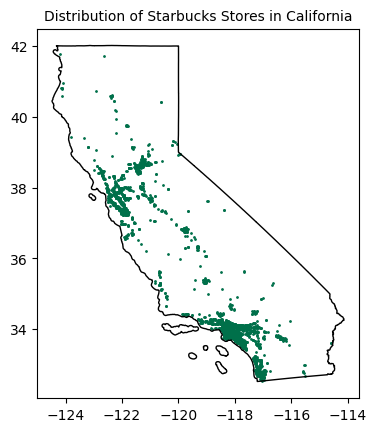

In [8]:

plt.figure(figsize=(25, 15))

df[df['STUSPS'] == 'CA'].boundary.plot(edgecolor='black', linewidth=1, facecolor='none')

for coord in starbucks_ca['coordinates']:
    plt.scatter(coord[0], coord[1], color='#00704A', s=1)  
plt.title("Distribution of Starbucks Stores in California", fontsize=10)

plt.show()


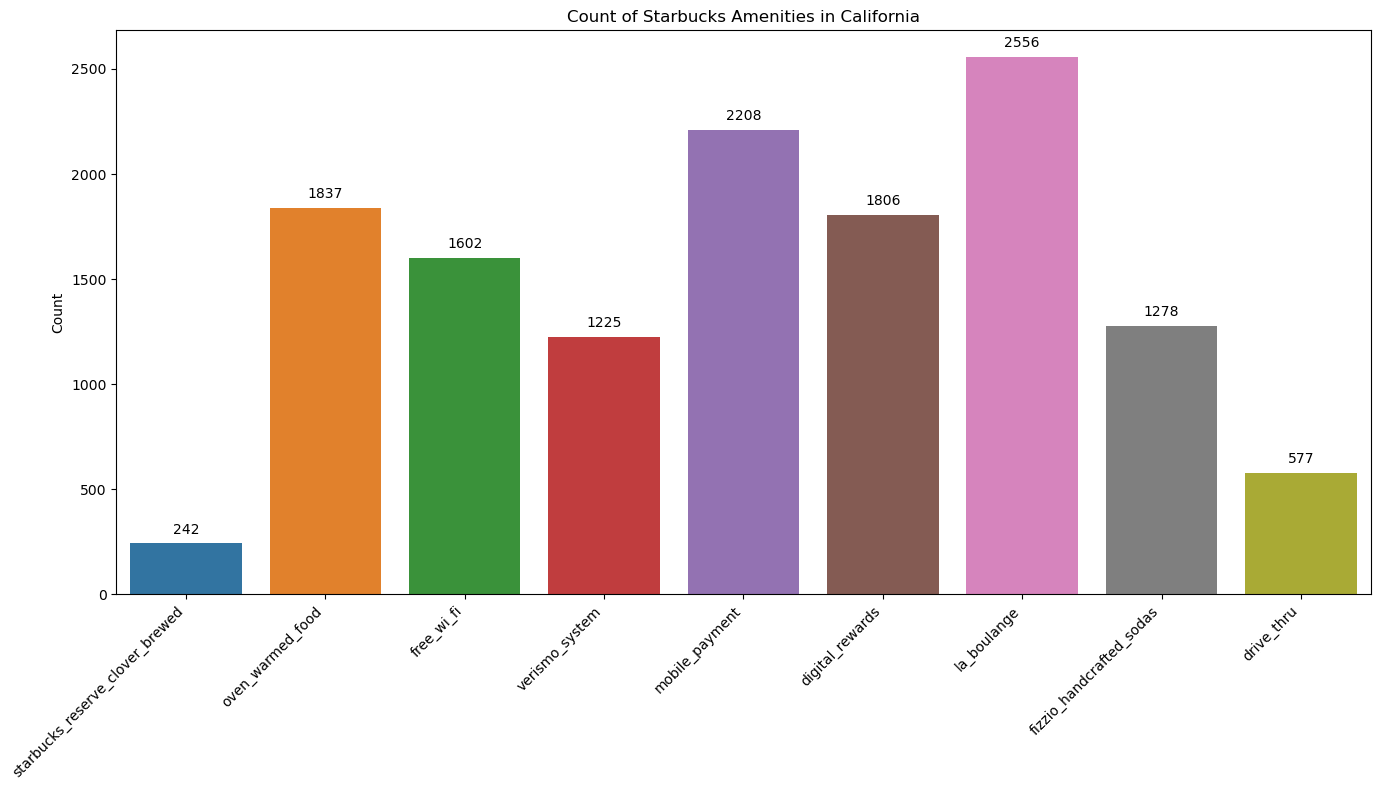

In [9]:
import seaborn as sns


amenities_cols = [
    'starbucks_reserve_clover_brewed', 'oven_warmed_food', 'free_wi_fi',
    'verismo_system', 'mobile_payment', 'digital_rewards', 'la_boulange',
    'fizzio_handcrafted_sodas', 'drive_thru'
]

amenities_sum = starbucks_ca[amenities_cols].sum()

plt.figure(figsize=(14, 8))
sns_bar = sns.barplot(x=amenities_sum.index, y=amenities_sum.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Starbucks Amenities in California')

for p in sns_bar.patches:
    sns_bar.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()


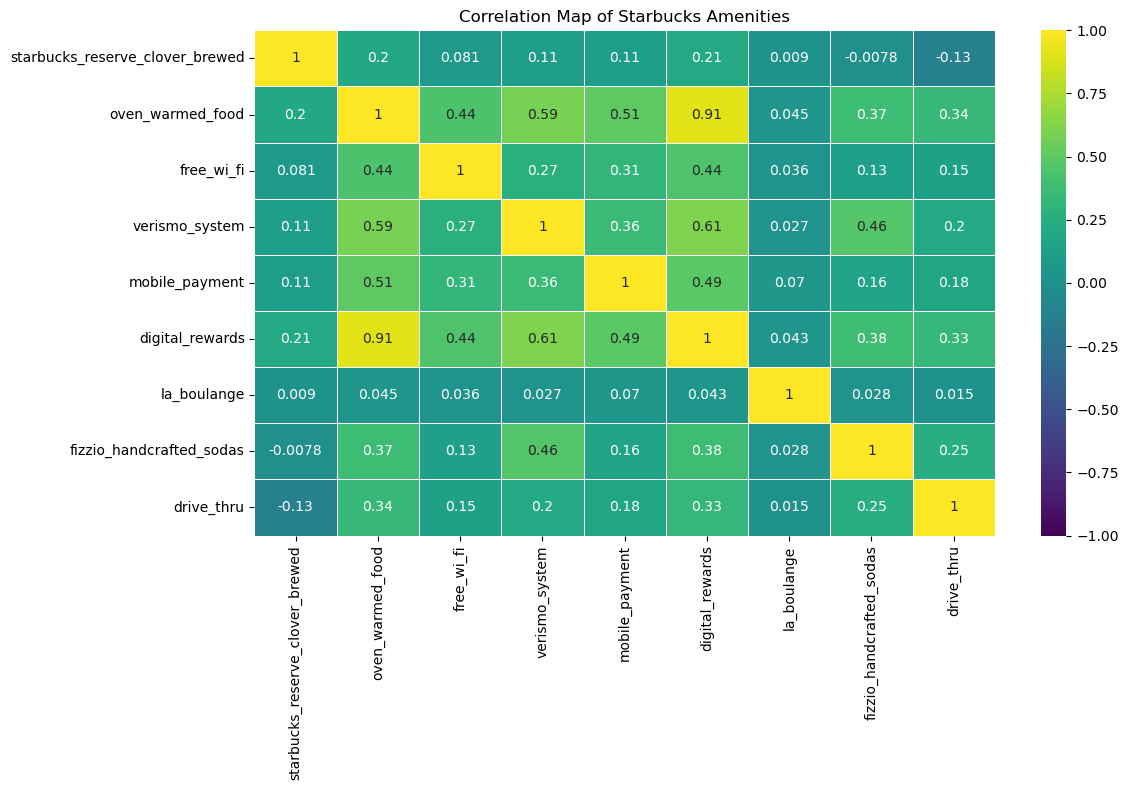

In [10]:

correlation_matrix = starbucks_ca[amenities_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Map of Starbucks Amenities')
plt.tight_layout()
plt.show()


<Figure size 2500x1500 with 0 Axes>

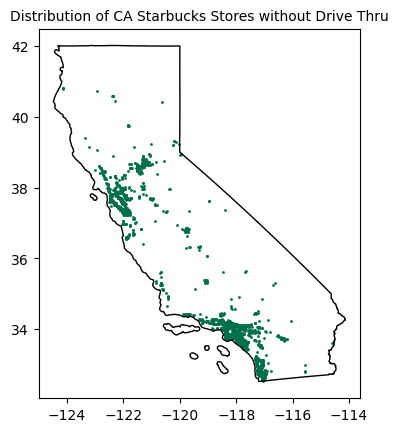

In [11]:

plt.figure(figsize=(25, 15))

df[df['STUSPS'] == 'CA'].boundary.plot(edgecolor='black', linewidth=1, facecolor='none')

for coord in starbucks_ca['coordinates'][starbucks_ca['drive_thru']==0]:
    plt.scatter(coord[0], coord[1], color='#00704A', s=1)  
plt.title("Distribution of CA Starbucks Stores without Drive Thru", fontsize=10)

plt.show()


<Figure size 2500x1500 with 0 Axes>

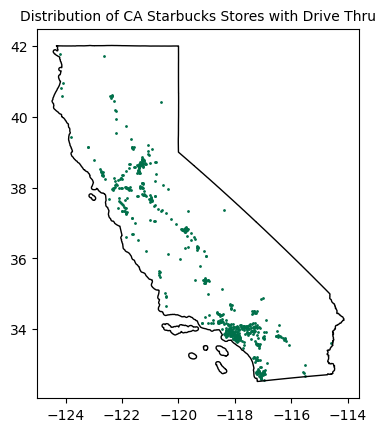

In [12]:

plt.figure(figsize=(25, 15))

df[df['STUSPS'] == 'CA'].boundary.plot(edgecolor='black', linewidth=1, facecolor='none')

for coord in starbucks_ca['coordinates'][starbucks_ca['drive_thru']==1]:
    plt.scatter(coord[0], coord[1], color='#00704A', s=1)  
plt.title("Distribution of CA Starbucks Stores with Drive Thru", fontsize=10)

plt.show()

<Figure size 2500x1500 with 0 Axes>

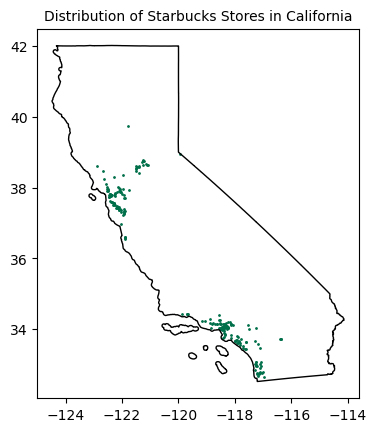

In [13]:
plt.figure(figsize=(25, 15))

df[df['STUSPS'] == 'CA'].boundary.plot(edgecolor='black', linewidth=1, facecolor='none')

for coord in starbucks_ca['coordinates'][starbucks_ca['starbucks_reserve_clover_brewed']==1]:
    plt.scatter(coord[0], coord[1], color='#00704A', s=1)  
plt.title("Distribution of Starbucks Stores in California", fontsize=10)

plt.show()

In [14]:
starbucks_ca.head(1)

,id,name,ownership_type,phone_number,address,city,county,zip,coordinates,state,...,starbucks_reserve_clover_brewed,oven_warmed_food,free_wi_fi,verismo_system,mobile_payment,digital_rewards,la_boulange,fizzio_handcrafted_sodas,drive_thru,link
0,9128,100 West Portal/Vicente,Company Owned,(415) 664-8370,"100 West Portal, 941271306 San Francisco Coun...",San Francisco - San Francisco County,San Francisco County,941271306,"(-122.467323, 37.739684)",California,...,True,True,False,False,True,True,True,False,False,http://www.starbucks.com/store/9128/us


In [15]:
starbucks_city.head(1)

,id,city,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Monterey Park - Los Angeles County,Monterey Park,Los Angeles County,1,17,1.30,43.1,"$51,736",60269,19,7.67,1,1.0,68.0,364.0,125.0,1.0


In [16]:
starbucks_county.head(1)

,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Siskiyou County,1,22.0,0.002,47.0,37865.0,44900.0,85.0,6287.0,1,4.0,1.0,47.0,3.0,45.0


In [19]:
def clean_city_name(city):
    if '-' in city:
        return city.split('-')[0].strip()
    return city

In [20]:
starbucks_ca['city'] = starbucks_ca['city'].apply(clean_city_name)

In [21]:
merged_data = pd.merge(starbucks_ca, starbucks_city, on='city', how='left')

In [22]:
merged_data.head()

,id_x,name,ownership_type,phone_number,address,city,county_x,zip,coordinates,state,...,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,9128,100 West Portal/Vicente,Company Owned,(415) 664-8370,"100 West Portal, 941271306 San Francisco Coun...",San Francisco,San Francisco County,941271306,"(-122.467323, 37.739684)",California,...,"$72,947",805235,48,46.87,431.0,261.0,422.0,266.0,279.0,91.0
1,14672,"10th & Hwy 14, Palmdale",Company Owned,661-266-2314,"39904 10th Street West, 935513003 Los Angeles...",Palmdale,Los Angeles County,935513003,"(-118.147264, 34.607218)",California,...,"$55,213",152750,49,105.96,339.0,62.0,24.0,52.0,160.0,94.0
2,8147,"10th & Market, San Diego",Company Owned,619-696-3750,"1011 Market Street, 921017233 San Diego Count...",San Diego,San Diego County,921017233,"(-117.155362, 32.711361)",California,...,"$63,739",1307402,59,325.19,432.0,251.0,283.0,137.0,221.0,165.0
3,15457,11th & Corral Hollow - Tracy,Company Owned,209-830-1348,"1857 W. 11th Street, 953763727 San Joaquin Co...",Tracy,San Joaquin County,953763727,"(-121.451307, 37.739591)",California,...,"$76,739",82922,53,22,309.0,148.0,175.0,106.0,303.0,120.0
4,10036,"11th & Grand, Los Angeles",Company Owned,2137491751,"1111 South Grand Avenue, 900152176 Los Angele...",Los Angeles,Los Angeles County,900152176,"(-118.262377, 34.041593)",California,...,"$50,028",3792621,50,468.67,433.0,102.0,309.0,154.0,107.0,101.0


In [23]:
merged_data.city.value_counts()

Los Angeles      221
San Diego        139
San Francisco     88
San Jose          73
Sacramento        65
                ... 
Temple City        1
Dinuba             1
Laguna Woods       1
Antelope           1
Yreka              1
Name: city, Length: 434, dtype: int64

In [24]:
starbucks_city.head(1)

,id,city,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Monterey Park - Los Angeles County,Monterey Park,Los Angeles County,1,17,1.30,43.1,"$51,736",60269,19,7.67,1,1.0,68.0,364.0,125.0,1.0


In [25]:
starbucks_city = pd.read_csv('starbucks_in_california_city_stats.csv')

In [26]:
starbucks_city['median_household_income'] = starbucks_city['median_household_income'].str.replace('$', '').str.replace(',', '')

C:\Users\Colin\AppData\Local\Temp\ipykernel_16064\1848538391.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  starbucks_city['median_household_income'] = starbucks_city['median_household_income'].str.replace('$', '').str.replace(',', '')


In [27]:
columns_to_convert = [
    'starbucks_per_million_inhabitants', 
    'starbucks_per_10_sq_mile', 
    'median_age', 
    'median_household_income', 
    '2010_population', 
    'percentage_of_white_population', 
    'land_area_sq_miles'
]

# Converting these columns to numeric, setting non-convertible values to NaN
for column in columns_to_convert:
    starbucks_city[column] = pd.to_numeric(starbucks_city[column], errors='coerce')

In [28]:
starbucks_city.head()

,id,city,county,number_of_starbucks,starbucks_per_million_inhabitants,starbucks_per_10_sq_mile,median_age,median_household_income,2010_population,percentage_of_white_population,land_area_sq_miles,number_of_starbucks_rank,starbucks_per_million_inhabitants_rank,starbucks_per_sq_mile_rank,median_age_rank,median_household_income_rank,percentage_of_white_population_rank
0,Monterey Park - Los Angeles County,Monterey Park,Los Angeles County,1,17.0,1.30,43.1,51736.0,60269.0,19.0,7.67,1,1.0,68.0,364.0,125.0,1.0
1,Milpitas - Santa Clara County,Milpitas,Santa Clara County,10,150.0,7.36,36.1,94589.0,66790.0,21.0,13.59,376,334.0,380.0,205.0,374.0,2.0
2,Rosemead - Los Angeles County,Rosemead,Los Angeles County,3,56.0,5.81,38.1,47964.0,53764.0,21.0,5.16,190,96.0,350.0,258.0,93.0,3.0
3,Hercules - Contra Costa County,Hercules,Contra Costa County,2,83.0,3.22,39.0,94493.0,24060.0,22.0,6.21,113,183.0,210.0,277.0,373.0,4.0
4,Cerritos - Los Angeles County,Cerritos,Los Angeles County,4,82.0,4.58,44.0,87853.0,49041.0,23.0,8.73,247,177.0,304.0,374.0,358.0,5.0


In [29]:
starbucks_city.isnull().sum()

id                                        0
city                                      0
county                                    0
number_of_starbucks                       0
starbucks_per_million_inhabitants         2
starbucks_per_10_sq_mile                  2
median_age                                2
median_household_income                   2
2010_population                           2
percentage_of_white_population            2
land_area_sq_miles                        2
number_of_starbucks_rank                  0
starbucks_per_million_inhabitants_rank    2
starbucks_per_sq_mile_rank                2
median_age_rank                           2
median_household_income_rank              2
percentage_of_white_population_rank       2
dtype: int64

In [30]:
columns = ['starbucks_per_million_inhabitants','starbucks_per_10_sq_mile','median_age','median_household_income',
          '2010_population','land_area_sq_miles','starbucks_per_million_inhabitants_rank','starbucks_per_sq_mile_rank','median_household_income_rank',
          'percentage_of_white_population_rank']
for col in columns:
    mean = starbucks_city[col].mean()
    starbucks_city[col].fillna(mean, inplace=True)

In [31]:
columns = ['starbucks_per_million_inhabitants','starbucks_per_10_sq_mile','median_age','median_household_income',
          '2010_population','land_area_sq_miles','starbucks_per_million_inhabitants_rank','starbucks_per_sq_mile_rank','median_household_income_rank',
          'percentage_of_white_population_rank','number_of_starbucks_rank']

x = starbucks_city[columns]
y = starbucks_city['number_of_starbucks']


x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

print(result.summary())


                             OLS Regression Results                            
Dep. Variable:     number_of_starbucks   R-squared:                       0.939
Model:                             OLS   Adj. R-squared:                  0.937
Method:                  Least Squares   F-statistic:                     589.5
Date:                 Mon, 20 Nov 2023   Prob (F-statistic):          7.84e-248
Time:                         13:44:24   Log-Likelihood:                -1161.9
No. Observations:                  433   AIC:                             2348.
Df Residuals:                      421   BIC:                             2397.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [32]:
columns = ['2010_population','land_area_sq_miles','starbucks_per_million_inhabitants_rank',
            'starbucks_per_sq_mile_rank','number_of_starbucks_rank']

x = starbucks_city[columns]
y = starbucks_city['number_of_starbucks']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

print(result.summary())


                             OLS Regression Results                            
Dep. Variable:     number_of_starbucks   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.937
Method:                  Least Squares   F-statistic:                     1296.
Date:                 Mon, 20 Nov 2023   Prob (F-statistic):          1.77e-255
Time:                         13:44:24   Log-Likelihood:                -1164.9
No. Observations:                  433   AIC:                             2342.
Df Residuals:                      427   BIC:                             2366.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------